In [1]:

import warnings
import sys
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.svm import SVR
# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

In [2]:
concrete_data = pd.read_csv("concrete.csv")

In [3]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
concrete_data.shape

(1030, 9)

In [5]:
concrete_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
concrete_data.head(15)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.30,212.00,0.00,203.50,0.00,971.80,748.50,28,29.89
1,168.90,42.20,124.30,158.30,10.80,"1,080.80",796.20,14,23.51
2,250.00,0.00,95.70,187.40,5.50,956.90,861.20,28,29.22
3,266.00,114.00,0.00,228.00,0.00,932.00,670.00,28,45.85
4,154.80,183.40,0.00,193.30,9.10,"1,047.40",696.70,28,18.29
5,255.00,0.00,0.00,192.00,0.00,889.80,945.00,90,21.86
6,166.80,250.20,0.00,203.50,0.00,975.60,692.60,7,15.75
7,251.40,0.00,118.30,188.50,6.40,"1,028.40",757.70,56,36.64
8,296.00,0.00,0.00,192.00,0.00,"1,085.00",765.00,28,21.65
9,155.00,184.00,143.00,194.00,9.00,880.00,699.00,28,28.99


In [7]:
concrete_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,"1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00","1,030.00"
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.35,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.40,968.00,779.50,28.00,34.45
75%,350.00,142.95,118.30,192.00,10.20,"1,029.40",824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,"1,145.00",992.60,365.00,82.60


In [8]:
concrete_data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

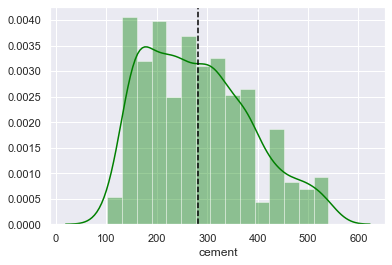

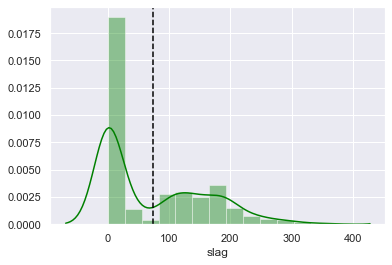

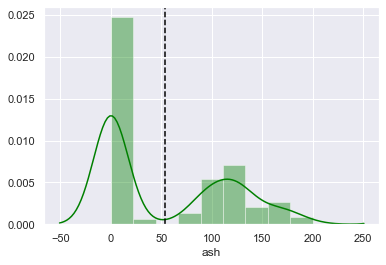

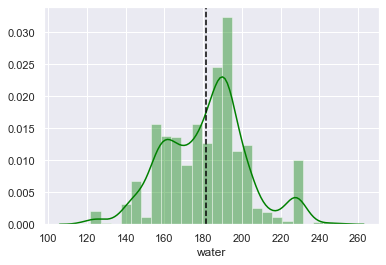

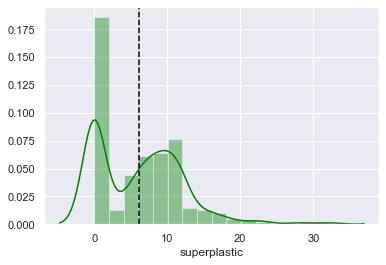

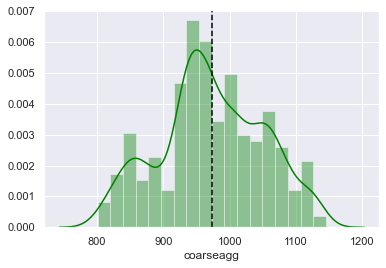

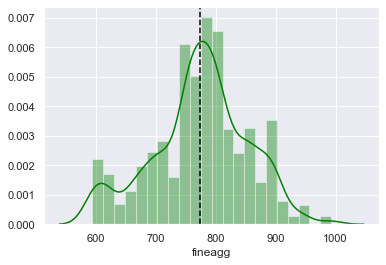

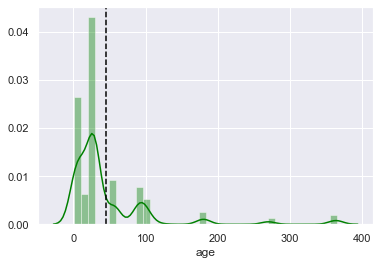

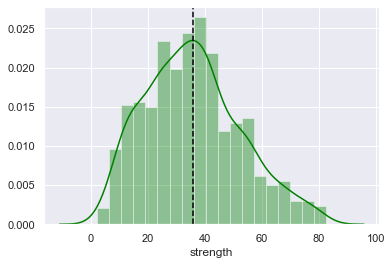

In [9]:
# Lets analyse each variable
cols = [i for i in concrete_data.columns if i != 'strength']
for col in concrete_data.columns:
    sns.distplot( concrete_data[col] , color="green")
    plt.axvline(concrete_data[col].mean(),linestyle="dashed",label="mean", color='black')
    plt.show()

    

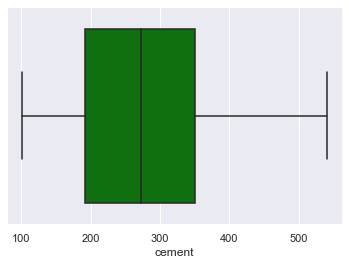

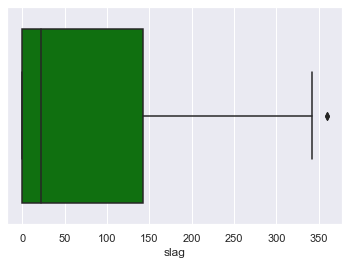

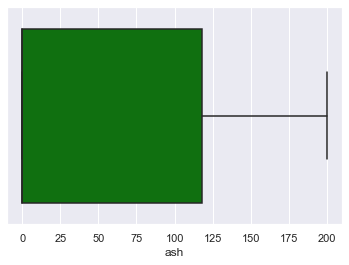

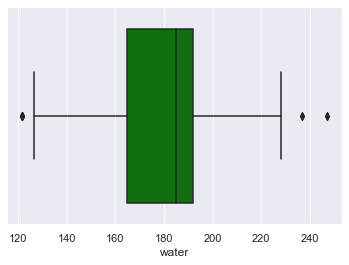

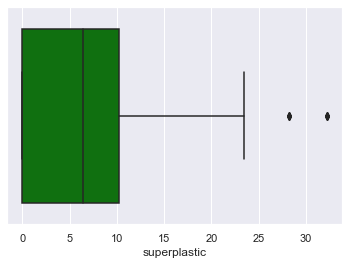

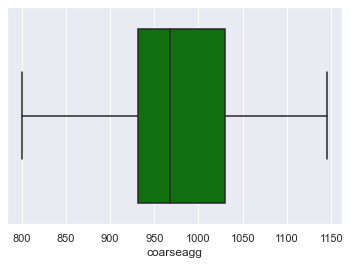

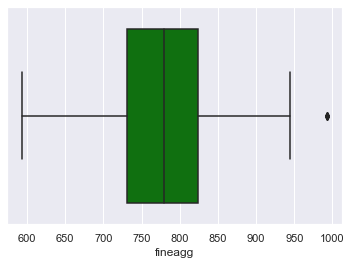

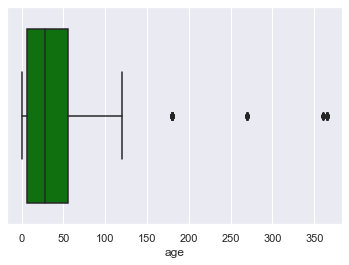

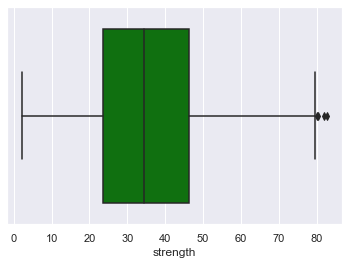

In [10]:
for col in concrete_data.columns:
    sns.boxplot(concrete_data[col] , color="green")
    plt.show()



Insights:
1. Cement, water, Super Plastiq, coarseagg, fineagg have near normal distribution
2. There are ouliers in superplastic, water, fineagg, age and slag
3. Target variable strength has near normal distribution with some outliers

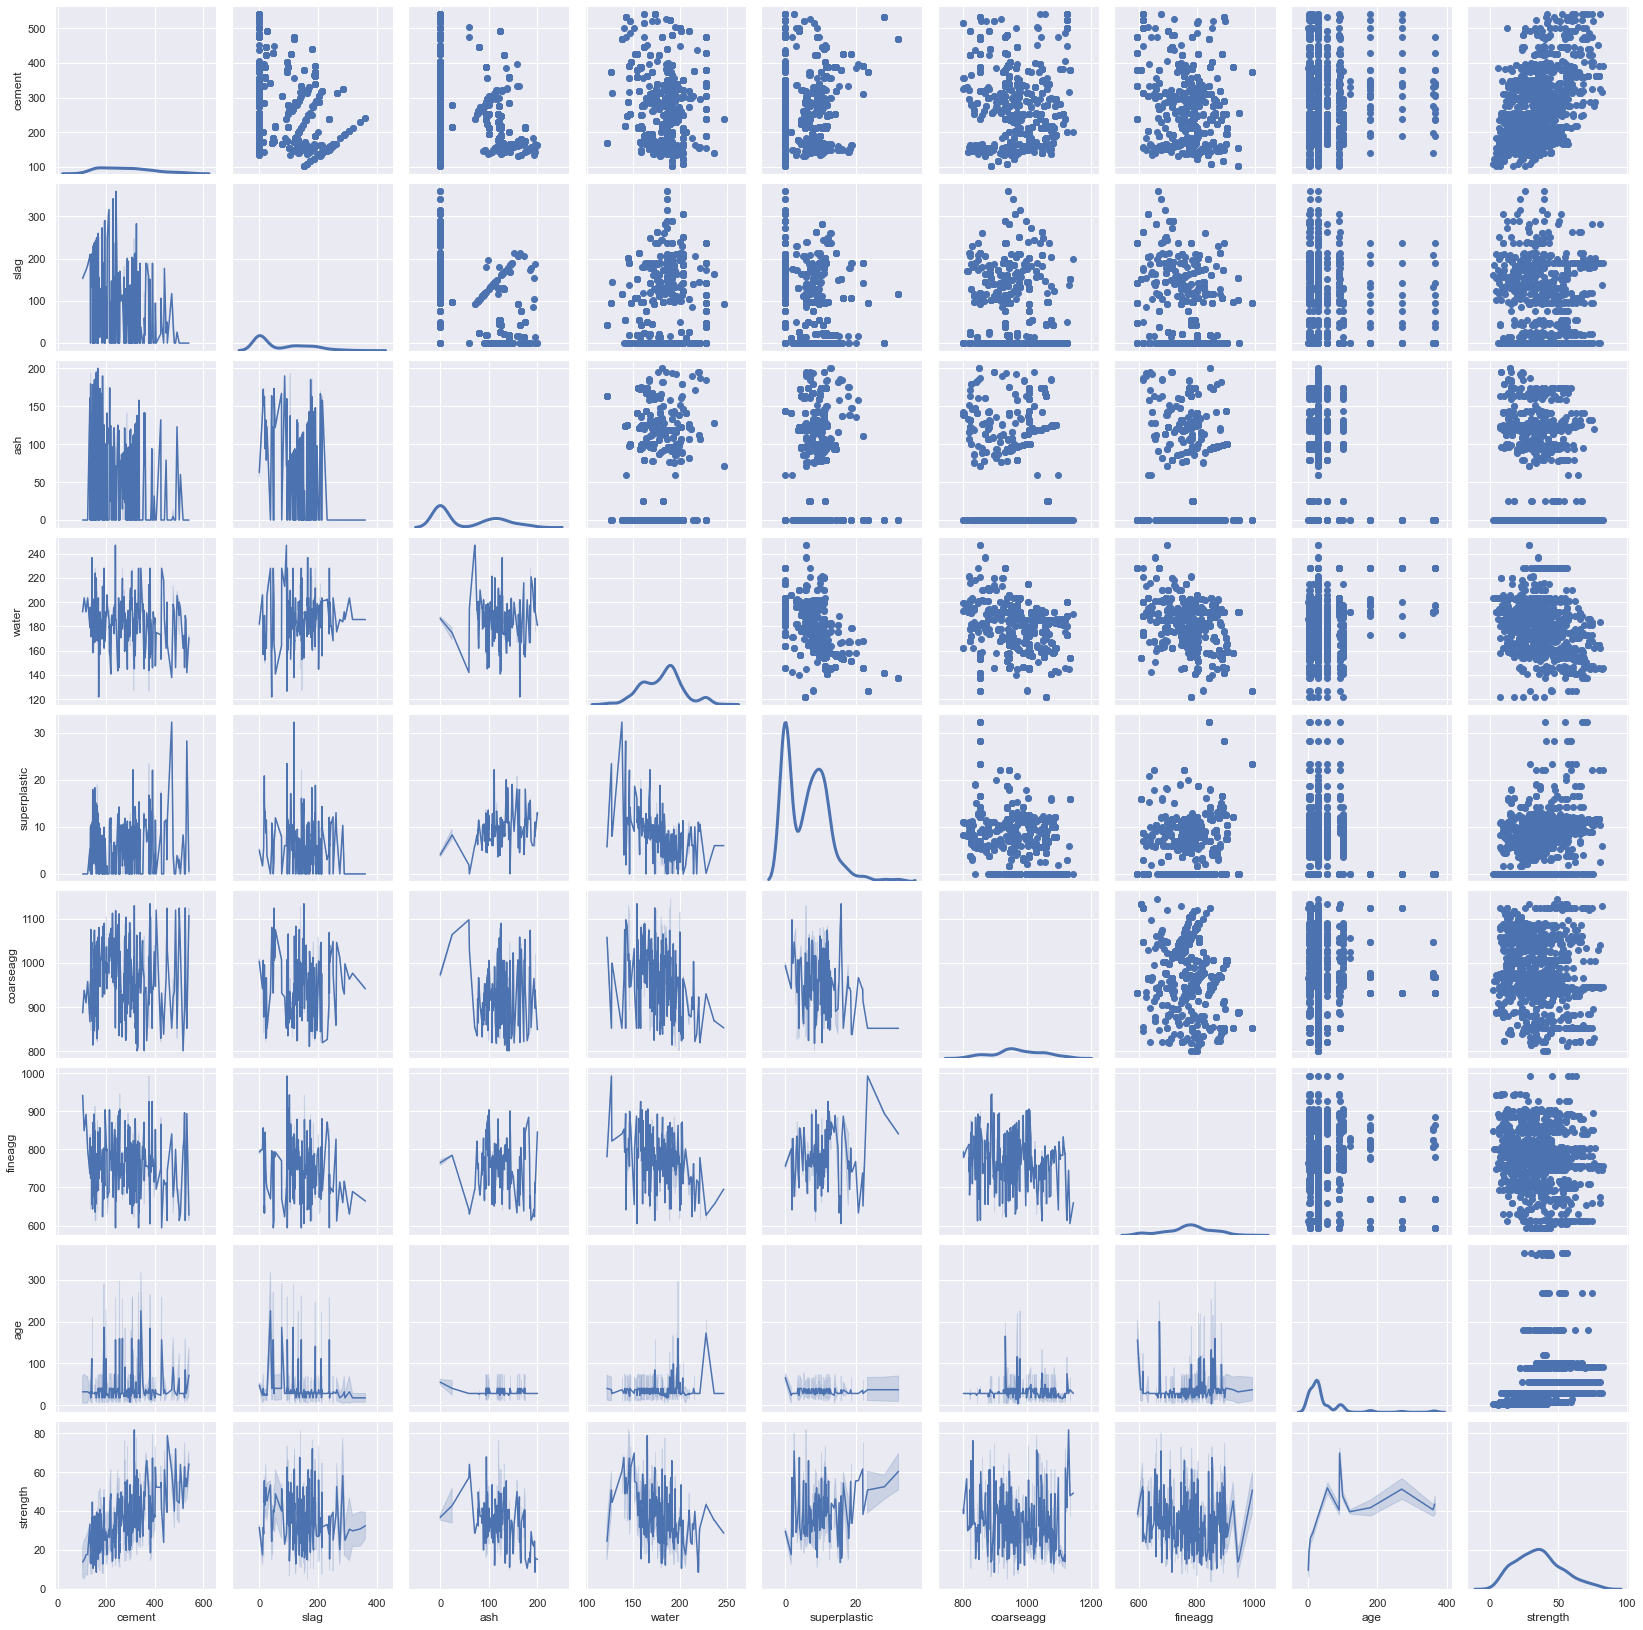

In [11]:
# relation between varios variables
g = sns.PairGrid(concrete_data)
g.map_upper(plt.scatter)
g.map_lower(sns.lineplot)
g.map_diag(sns.kdeplot, lw=3, legend=True);

Insights:
1. There is a corelation between Strength and cememt
2. negative correlation between superplastic and water

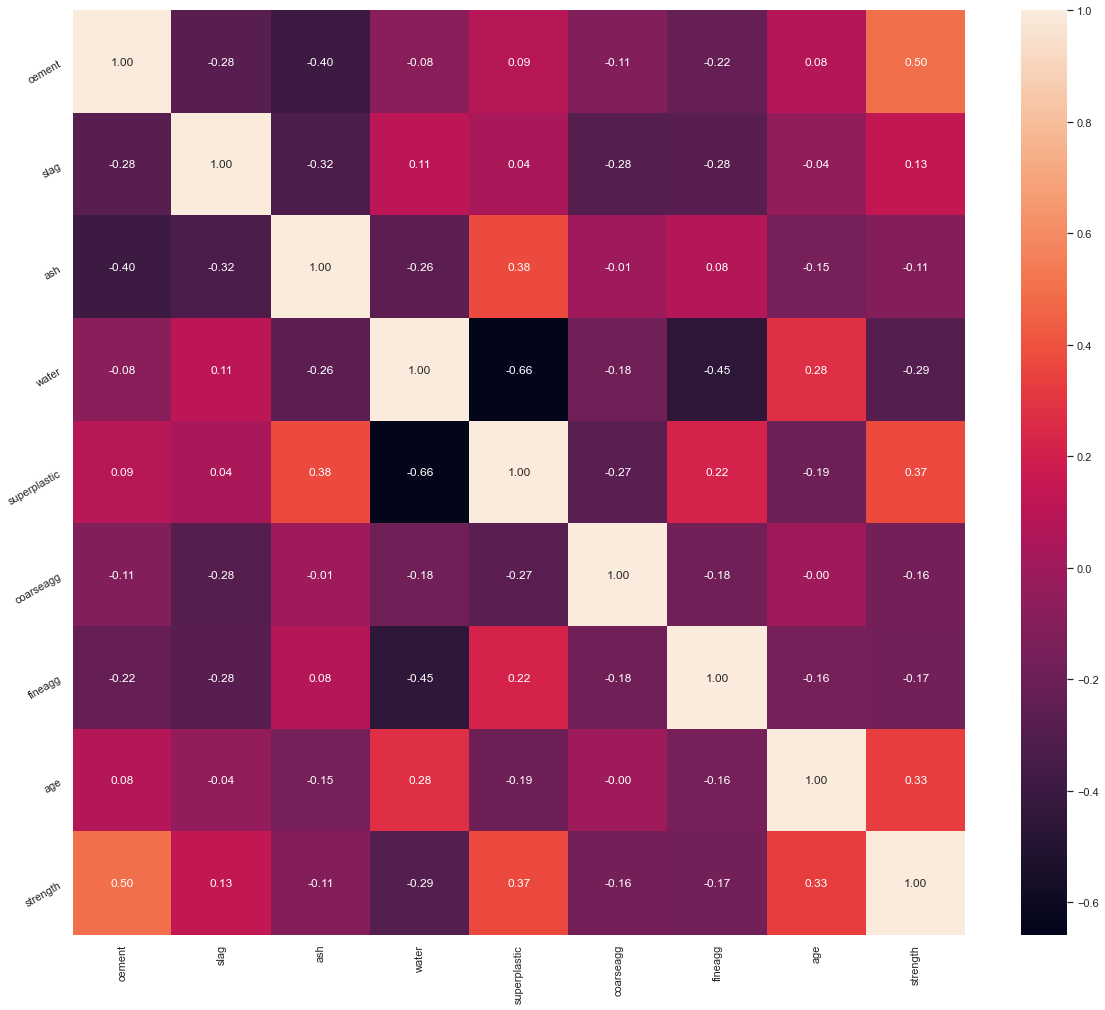

In [12]:
# Now lets look at the correlation matrix
corr = concrete_data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(20,17))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Insights:
1. As expected Cement and strength have storng positive correlation
2. Age and superplastic also have some positive correlation with Strength
3. Water is negative correlated to strength and the correlation is mild
4. Water and superplastic have storng negative correlation
5. Ash, slag, coarseagg and fineagg are not strong predictors.

In [13]:
# There is no need for scaling as all the features are on same scale 
# To remove the out liers we can use the z score


print(concrete_data.shape)
from scipy.stats import zscore
z_concrete_data = concrete_data

col_tobe_treated = ['balance', 'campaign', 'duration', 'pdays', 'previous']
for col in z_concrete_data.columns:
    name = col + '_outliers'
    z_concrete_data[name] = z_concrete_data[col]
    z_concrete_data[name]= zscore(z_concrete_data[name])
    condition1 = (z_concrete_data[name]>3) | (z_concrete_data[name]<-3)
    z_concrete_data = z_concrete_data.drop(z_concrete_data[condition1].index, axis = 0, inplace=False)
    z_concrete_data = z_concrete_data.drop(name, axis=1)
    print(z_concrete_data.shape)
    
print(z_concrete_data.columns)    

(1030, 9)
(1030, 9)
(1026, 9)
(1026, 9)
(1024, 9)
(1014, 9)
(1014, 9)
(1014, 9)
(981, 9)
(981, 9)
Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


In [14]:
# Let's split our data into traing and test sets
from sklearn.model_selection import train_test_split
y_set = z_concrete_data[['strength']]
X_set = z_concrete_data.drop(labels= "strength" , axis = 1)
# 80-20
X_model_train, X_test, y_model_train, y_test = train_test_split(X_set, y_set, test_size=0.20, random_state=7)
# 70-30
X_train, X_validate, y_train, y_validate = train_test_split(X_model_train, y_model_train, test_size=0.30, random_state=7)

In [15]:
n_split = 10
randon_state = 7
kfold = KFold(n_split, random_state = randon_state)
linear_model = []
linear_model_validate_score = []
linear_model_RMSE = []
linear_model_R_2 = []
Model = []
RMSE = []
linear_model_train_score =[]

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
linear_model.append('Linear Regression')
# coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

lr_score_train = regression_model.score(X_train, y_train)
print("Linear Regression Model train Score:",lr_score_train)

lr_score = regression_model.score(X_validate, y_validate)
print("Linear Regression Model Validate Score:",lr_score)

lr_rmse = np.sqrt((-1) * cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Linear Regression Model RMSE :", lr_rmse)


lr_r2 = cross_val_score(regression_model, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Linear Regression Model R-Square Value :",lr_r2)


regression_model_df = pd.DataFrame({'Model': ['Linear Regression'], 'Trainng Score': [lr_score_train],
                           'Validation Score': [lr_score],
                           'RMSE': [lr_rmse],
                           'R Squared': [lr_r2]})
regression_model_df

The coefficient for cement is 0.09838576677264285
The coefficient for slag is 0.08317208831023008
The coefficient for ash is 0.060178834667909166
The coefficient for water is -0.25374299785676246
The coefficient for superplastic is 0.3256558720038034
The coefficient for coarseagg is -0.001945281014725097
The coefficient for fineagg is -0.00675028064638499
The coefficient for age is 0.21544987775657307
The intercept for our model is 41.358825276824284
Linear Regression Model train Score: 0.7004425863670986
Linear Regression Model Validate Score: 0.7036875230230164
Linear Regression Model RMSE : 9.384263167056787
Linear Regression Model R-Square Value : 0.6741673663206648


,Model,Trainng Score,Validation Score,RMSE,R Squared
0,Linear Regression,0.70,0.70,9.38,0.67


In [16]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dTreeR = DecisionTreeRegressor(criterion = 'mse', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)

print('*************Feature Importance*********************')
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))
print('**********************************')


print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

bgcl = BaggingRegressor(base_estimator=dTreeR, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)
print('Bagging Regressor')
bagging_train_score = bgcl.score(X_train, y_train)
print("BaggingRegressor Model Training Set Score:",bagging_train_score)


bgcl_score = bgcl.score(X_validate, y_validate)
print("Bagging Regressor Model Validation Set Score:", bgcl_score)

bgcl_rmse = np.sqrt((-1) * cross_val_score(bgcl, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Bagging Regressor Model RMSE :", bgcl_rmse)


bgcl_r2 = cross_val_score(bgcl, X_train, y_train, cv=kfold, scoring='r2').mean()
print("Bagging Regressor Model R-Square Value :", bgcl_r2)

bgcl_model_df = pd.DataFrame({'Model': ['Bagging Regressor'], 'Trainng Score': [bagging_train_score],
                           'Validation Score': [bgcl_score],
                           'RMSE': [bgcl_rmse],
                           'R Squared': [bgcl_r2]})
bgcl_model_df

*************Feature Importance*********************
              Imp
cement       0.23
slag         0.00
ash          0.00
water        0.25
superplastic 0.11
coarseagg    0.00
fineagg      0.00
age          0.41
**********************************
0.6537671396114315
0.5742800810445317
Bagging Regressor
BaggingRegressor Model Training Set Score: 0.750456974702115
Bagging Regressor Model Validation Set Score: 0.683864955190634


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Bagging Regressor Model RMSE : 9.15450685071791


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Bagging Regressor Model R-Square Value : 0.6944930446770214


,Model,Trainng Score,Validation Score,RMSE,R Squared
0,Bagging Regressor,0.75,0.68,9.15,0.69


In [17]:
from sklearn.ensemble import AdaBoostRegressor

adbst = AdaBoostRegressor(n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

adbst = adbst.fit(X_train, y_train)
print('Boosting Regressor')
boost_train_score = adbst.score(X_train, y_train)
print("BoostingRegressor Model Training Set Score:",boost_train_score)


adbst_score = adbst.score(X_validate, y_validate)
print("Boosting Regressor Model Validation Set Score:", adbst_score)

adbst_rmse = np.sqrt((-1) * cross_val_score(adbst, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Boosting Regressor Model RMSE :", adbst_rmse)


adbst_r2 = cross_val_score(adbst, X_train, y_train, cv=kfold, scoring='r2').mean()
print("Boosting Regressor Model R-Square Value :", adbst_r2)

adbst_model_df = pd.DataFrame({'Model': ['Ada Boosting Regressor'], 'Trainng Score': [boost_train_score],
                           'Validation Score': [adbst_score],
                           'RMSE': [adbst_rmse],
                           'R Squared': [adbst_r2]})
adbst_model_df

/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Boosting Regressor
BoostingRegressor Model Training Set Score: 0.824703122402801
Boosting Regressor Model Validation Set Score: 0.7848666097200742
Boosting Regressor Model RMSE : 7.854813607158674


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Boosting Regressor Model R-Square Value : 0.774918673249092


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Model,Trainng Score,Validation Score,RMSE,R Squared
0,Ada Boosting Regressor,0.82,0.78,7.85,0.77


In [18]:
from sklearn.ensemble import GradientBoostingRegressor

grdbst = GradientBoostingRegressor(n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

grdbst = grdbst.fit(X_train, y_train)
print('Boosting Regressor')
grdbst_boost_train_score = grdbst.score(X_train, y_train)
print("BoostingRegressor Model Training Set Score:",grdbst_boost_train_score)


grdbst_score = grdbst.score(X_validate, y_validate)
print("Boosting Regressor Model Validation Set Score:", grdbst_score)

grdbst_rmse = np.sqrt((-1) * cross_val_score(grdbst, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Boosting Regressor Model RMSE :", grdbst_rmse)


grdbst_r2 = cross_val_score(grdbst, X_train, y_train, cv=kfold, scoring='r2').mean()
print("Boosting Regressor Model R-Square Value :", grdbst_r2)

grdbst_model_df = pd.DataFrame({'Model': ['Gradient Boosting Regressor'], 'Trainng Score': [grdbst_boost_train_score],
                           'Validation Score': [grdbst_score],
                           'RMSE': [grdbst_rmse],
                           'R Squared': [grdbst_r2]})
grdbst_model_df

/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Boosting Regressor
BoostingRegressor Model Training Set Score: 0.9223549563526434
Boosting Regressor Model Validation Set Score: 0.8697671731251244
Boosting Regressor Model RMSE : 6.351004328571328


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Boosting Regressor Model R-Square Value : 0.8519732337013712


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,Model,Trainng Score,Validation Score,RMSE,R Squared
0,Gradient Boosting Regressor,0.92,0.87,6.35,0.85


In [19]:
# Comparing scores 
frames = [regression_model_df, bgcl_model_df, adbst_model_df, grdbst_model_df]
result_df = pd.concat(frames)
result_df

,Model,Trainng Score,Validation Score,RMSE,R Squared
0,Linear Regression,0.70,0.70,9.38,0.67
0,Bagging Regressor,0.75,0.68,9.15,0.69
0,Ada Boosting Regressor,0.82,0.78,7.85,0.77
0,Gradient Boosting Regressor,0.92,0.87,6.35,0.85


In [20]:
# Out of these three Gradient Boosting Regressor is the best 
# Lets run this on test data
grdbst_boost_test_score = grdbst.score(X_test, y_test)

In [21]:
grdbst_boost_test_score

0.831454407610402

In [22]:
# now lest tune some hyper parameters to squeeze best performance
from sklearn.model_selection import RandomizedSearchCV
grdbst = GradientBoostingRegressor(n_estimators=50, random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)
param_grid = {'criterion': ['friedman_mse','mse','mae'], 'learning_rate':[1, 0.5, 0.25, 0.1, 0.05, 0.01], 
              'max_depth': [2,3,None]}

randomcv = RandomizedSearchCV(grdbst, param_distributions=param_grid, n_iter=10)
randomcv.fit(X_train, y_train)

/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

RandomizedSearchCV(estimator=GradientBoostingRegressor(n_estimators=50,
                                                       random_state=1),
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [2, 3, None]})

In [23]:
print(randomcv.best_params_)

{'max_depth': 3, 'learning_rate': 0.5, 'criterion': 'mse'}


In [24]:

grdbst = GradientBoostingRegressor(max_depth= 3, learning_rate= 0.1, criterion= 'friedman_mse')
grdbst = grdbst.fit(X_train, y_train)

/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
grdbst.score(X_test, y_test)

0.875802791048038

In [26]:
grdbst_val_score = grdbst.score(X_validate, y_validate)
grdbst_score = grdbst.score(X_test, y_test)
print("Gradient Boost Regressor Model test Set Score:", grdbst_score)

grdbst_rmse = np.sqrt((-1) * cross_val_score(grdbst, X_test, y_test.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Gradient Boost Regressor Model RMSE :", grdbst_rmse)


grdbst_r2 = cross_val_score(grdbst, X_test, y_test, cv=kfold, scoring='r2').mean()
print("Gradient BoostRegressor Model R-Square Value :", grdbst_r2)

grdbst_model_tuned_df = pd.DataFrame({'Model': ['Gradient Boosting Regressor_tuned'], 'Testing Score': [grdbst_score],
                                      'Validation Score': [grdbst_val_score],
                           'RMSE': [grdbst_rmse],
                           'R Squared': [grdbst_r2]})

Gradient Boost Regressor Model test Set Score: 0.875802791048038
Gradient Boost Regressor Model RMSE : 6.647156185087239


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

Gradient BoostRegressor Model R-Square Value : 0.831994370418705


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [27]:
grdbst_model_tuned_df

,Model,Testing Score,Validation Score,RMSE,R Squared
0,Gradient Boosting Regressor_tuned,0.88,0.90,6.65,0.83


In [28]:
# Now lets tune adaboost
adbst = AdaBoostRegressor(n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

adbst = adbst.fit(X_train, y_train)
param_dist_ada = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

randomcv_ada = RandomizedSearchCV(adbst, param_distributions=param_dist_ada, n_iter=10)
randomcv_ada.fit(X_train, y_train)

/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

RandomizedSearchCV(estimator=AdaBoostRegressor(random_state=1),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100]})

In [29]:
print(randomcv_ada.best_params_)

{'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.3}


In [30]:
adbst_tuned = AdaBoostRegressor(n_estimators=100, loss='linear', learning_rate=0.3)
adbst_tuned = adbst_tuned.fit(X_train, y_train)

/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
adbst_tuned.score(X_test, y_test)

0.7445936287427176

In [32]:
adbst_tuned_val_score = adbst_tuned.score(X_validate, y_validate)
adbst_tuned_score = adbst_tuned.score(X_test, y_test)
print("ada Boost Regressor Model test Set Score:", adbst_tuned_score)

adbst_tuned_rmse = np.sqrt((-1) * cross_val_score(adbst_tuned, X_test, y_test.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("ada Boost Regressor Model RMSE :", adbst_tuned_rmse)


adbst_tuned_r2 = cross_val_score(adbst_tuned, X_test, y_test, cv=kfold, scoring='r2').mean()
print("ada BoostRegressor Model R-Square Value :", adbst_tuned_r2)

adbst_tuned_model_tuned_df = pd.DataFrame({'Model': ['Ada Boosting Regressor_tuned'], 'Testing Score': [adbst_tuned_score],
                                      'Validation Score': [adbst_tuned_val_score],
                           'RMSE': [adbst_tuned_rmse],
                           'R Squared': [adbst_tuned_r2]})

ada Boost Regressor Model test Set Score: 0.7445936287427176
ada Boost Regressor Model RMSE : 8.4363196866433


/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/sumitbhasin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

ada BoostRegressor Model R-Square Value : 0.7242638546553575


In [33]:
adbst_tuned_model_tuned_df

,Model,Testing Score,Validation Score,RMSE,R Squared
0,Ada Boosting Regressor_tuned,0.74,0.78,8.44,0.72


In [34]:
tuned_frames = [grdbst_model_tuned_df, adbst_tuned_model_tuned_df]
tuned_result =  pd.concat(tuned_frames)
print('Scores all models no tuning')
result_df



Scores all models no tuning


,Model,Trainng Score,Validation Score,RMSE,R Squared
0,Linear Regression,0.70,0.70,9.38,0.67
0,Bagging Regressor,0.75,0.68,9.15,0.69
0,Ada Boosting Regressor,0.82,0.78,7.85,0.77
0,Gradient Boosting Regressor,0.92,0.87,6.35,0.85


In [35]:
print('Scores of two tuned models')
tuned_result

Scores of two tuned models


,Model,Testing Score,Validation Score,RMSE,R Squared
0,Gradient Boosting Regressor_tuned,0.88,0.90,6.65,0.83
0,Ada Boosting Regressor_tuned,0.74,0.78,8.44,0.72
